<a href="https://colab.research.google.com/github/waniniRan/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members:**
1. Canice Musa Quraishy 166324
2. Katanu Kavila-Kwinga 166167
3. Cindy Wanini Gichuhi 166994
4. Brian Kioko Mutungi 169007
5. Patrick Otieno 167747
6. Collins Cyrus Gitonga 167071
7. Asoh Great 169099



**Proof of participation**

***Question 1: Download and upload the Mall customers dataset from Kaggle.***

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

#Mounting the dataset to Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/Mall_Customers.csv')

df_raw = pd.read_csv(file_path)


Mounted at /content/drive


**2: Appropriately clean the data**

                        count unique     top freq   mean        std   min  \
CustomerID              200.0    NaN     NaN  NaN  100.5  57.879185   1.0   
Gender                    200      2  Female  112    NaN        NaN   NaN   
Age                     200.0    NaN     NaN  NaN  38.85  13.969007  18.0   
Annual Income (k$)      200.0    NaN     NaN  NaN  60.56  26.264721  15.0   
Spending Score (1-100)  200.0    NaN     NaN  NaN   50.2  25.823522   1.0   

                          25%    50%     75%    max  
CustomerID              50.75  100.5  150.25  200.0  
Gender                    NaN    NaN     NaN    NaN  
Age                     28.75   36.0    49.0   70.0  
Annual Income (k$)       41.5   61.5    78.0  137.0  
Spending Score (1-100)  34.75   50.0    73.0   99.0  


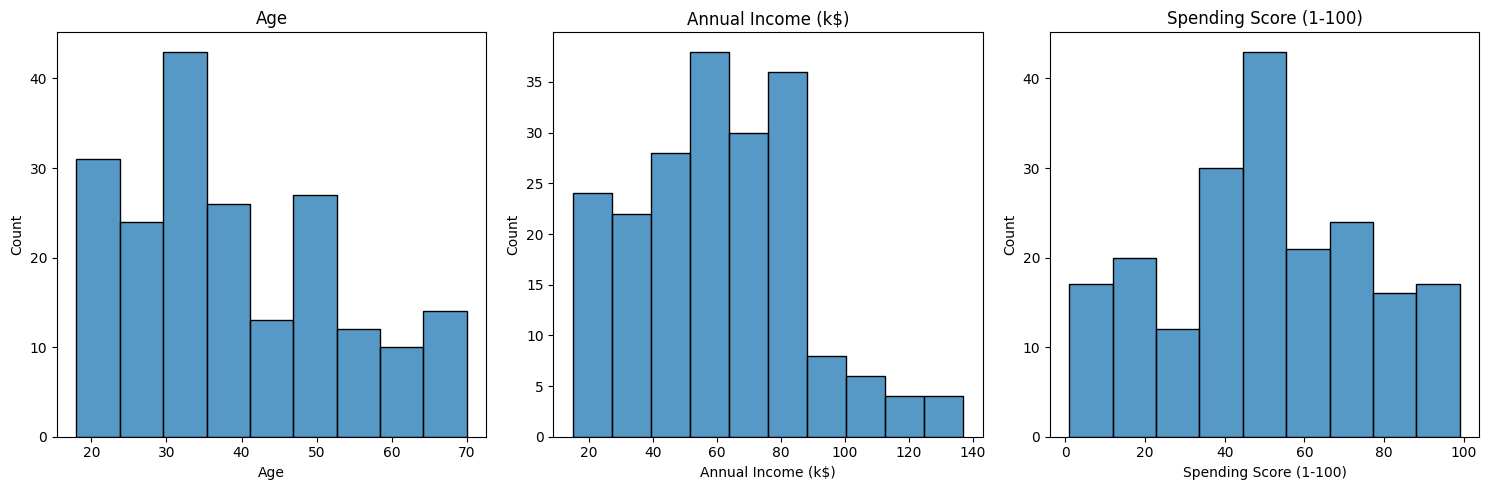

In [ ]:
#Cleaning the data
df_raw.shape
df_raw.dtypes
df_raw.isnull().sum()
df_raw = df_raw.drop_duplicates().reset_index(drop=True)

#Exploratory Data analysis
print(df_raw.describe(include='all').transpose())
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df_raw['Age'],kde=False, ax=axs[0]).set_title('Age')
sns.histplot(df_raw['Annual Income (k$)'],kde=False, ax=axs[1]).set_title('Annual Income (k$)')
sns.histplot(df_raw['Spending Score (1-100)'], kde=False,ax=axs[2]).set_title('Spending Score (1-100)')
plt.tight_layout()
plt.show()

Question 3: Use the K-means algorithm to create groups of customers based o

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1D Silhouette Score: 0.654
2D Silhouette Score: 0.555

=== 1D Clustering Silhouette Analysis ===


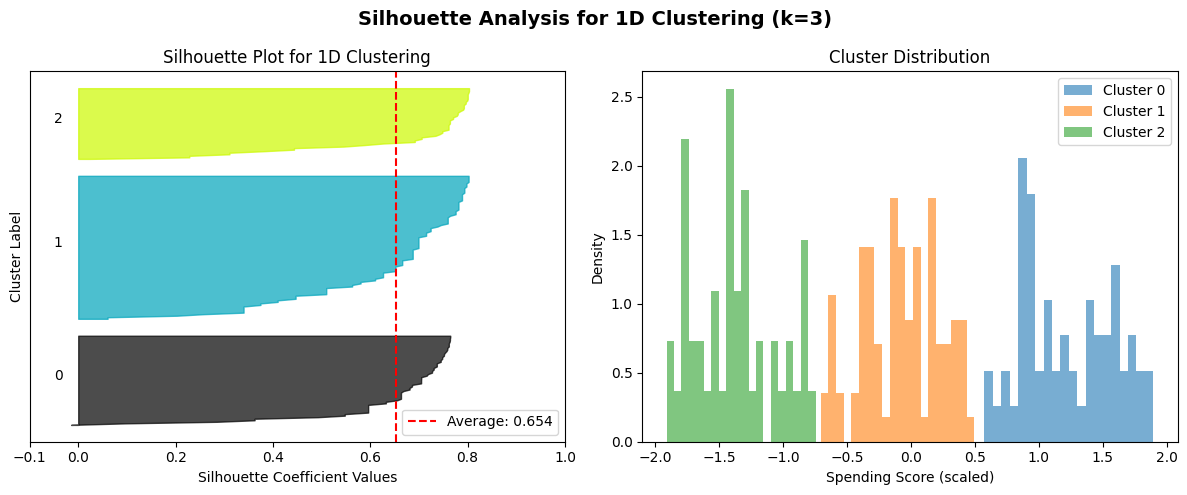


=== 2D Clustering Silhouette Analysis ===


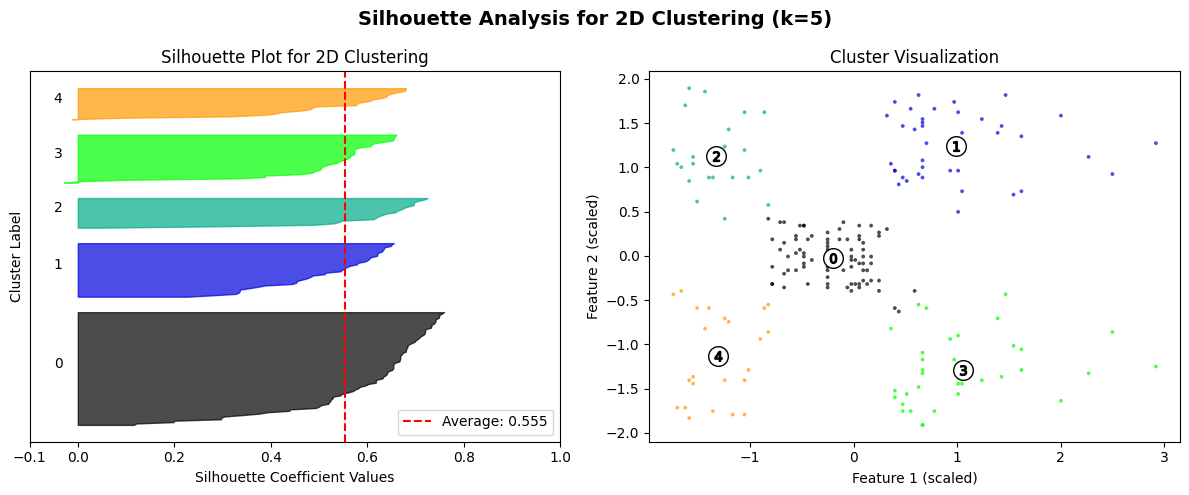

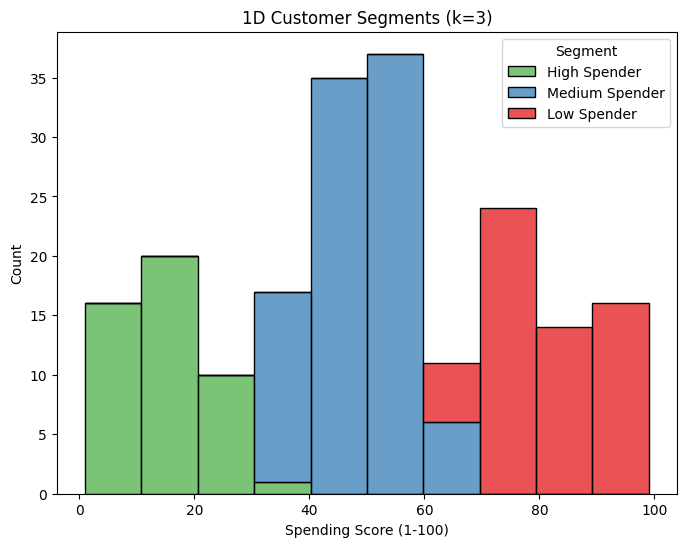

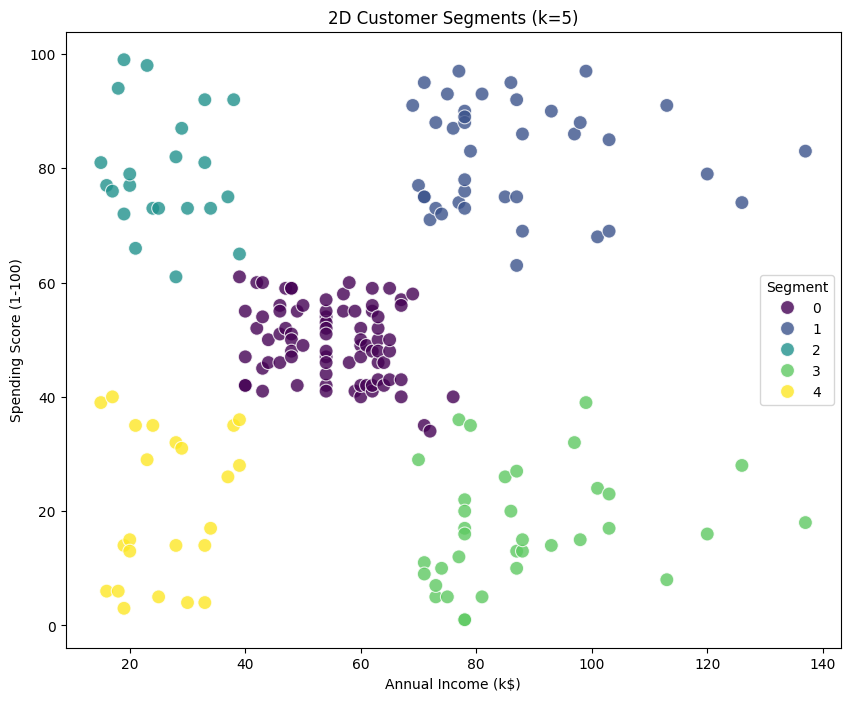

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/Mall_Customers.csv')
df_raw = pd.read_csv(file_path)

# Data preparation
X1 = df_raw[['Spending Score (1-100)']].values
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# For 2D clustering (Income and Spending Score)
X2 = df_raw[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Final optimal k values based on verification
optimal_k_1d = 3
optimal_k_2d = 5

# 1D K-Means
kmeans_1d = KMeans(n_clusters=optimal_k_1d, init='k-means++', random_state=42, n_init=10)
df_raw['Segment_1D'] = kmeans_1d.fit_predict(X1_scaled)

# 2D K-Means
kmeans_2d = KMeans(n_clusters=optimal_k_2d, init='k-means++', random_state=42, n_init=10)
df_raw['Segment_2D'] = kmeans_2d.fit_predict(X2_scaled)

# Calculate silhouette scores
silhouette_1d = silhouette_score(X1_scaled, df_raw['Segment_1D'])
silhouette_2d = silhouette_score(X2_scaled, df_raw['Segment_2D'])

print(f"1D Silhouette Score: {silhouette_1d:.3f}")
print(f"2D Silhouette Score: {silhouette_2d:.3f}")

# Function to plot silhouette diagram - FIXED: Pass kmeans objects as parameters
def plot_silhouette_diagram(X, labels, k, title, kmeans_obj=None):
    """
    Create a silhouette diagram for clustering results
    """
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Silhouette plot
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster Label')
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
                label=f'Average: {silhouette_avg:.3f}')
    ax1.legend()
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_title(f'Silhouette Plot for {title}')

    # Cluster visualization
    if X.shape[1] >= 2:
        colors = plt.cm.nipy_spectral(labels.astype(float) / k)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                   c=colors, edgecolor='k')

        # Labeling the clusters - use the provided kmeans_obj
        if kmeans_obj is not None:
            centers = kmeans_obj.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                       c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                           s=50, edgecolor='k')

        ax2.set_title('Cluster Visualization')
        ax2.set_xlabel('Feature 1 (scaled)')
        ax2.set_ylabel('Feature 2 (scaled)')
    else:
        # For 1D data, show distribution
        for i in range(k):
            cluster_data = X[labels == i]
            ax2.hist(cluster_data, bins=20, alpha=0.6,
                    label=f'Cluster {i}', density=True)
        ax2.set_xlabel('Spending Score (scaled)')
        ax2.set_ylabel('Density')
        ax2.legend()
        ax2.set_title('Cluster Distribution')

    plt.suptitle(f'Silhouette Analysis for {title} (k={k})', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot silhouette diagrams - FIXED: Pass kmeans objects
print("\n=== 1D Clustering Silhouette Analysis ===")
plot_silhouette_diagram(X1_scaled, df_raw['Segment_1D'], optimal_k_1d, "1D Clustering", kmeans_1d)

print("\n=== 2D Clustering Silhouette Analysis ===")
plot_silhouette_diagram(X2_scaled, df_raw['Segment_2D'], optimal_k_2d, "2D Clustering", kmeans_2d)

# Your original plots
# Plot 1D Segments
plt.figure(figsize=(8, 6))
sns.histplot(data=df_raw, x='Spending Score (1-100)', hue='Segment_1D', palette='Set1', multiple='stack', bins=10)
plt.title(f'1D Customer Segments (k={optimal_k_1d})')
plt.xlabel('Spending Score (1-100)')
plt.legend(title='Segment', labels=['High Spender', 'Medium Spender', 'Low Spender'])
plt.show()

# Plot 2D Segments
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment_2D',
    data=df_raw,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title(f'2D Customer Segments (k={optimal_k_2d})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Segment')
plt.show()

Question 4:
visualisation for 3a


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


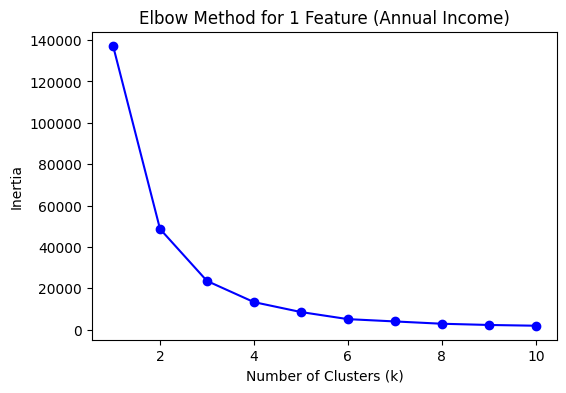

Silhouette Score (1 Feature): 0.563


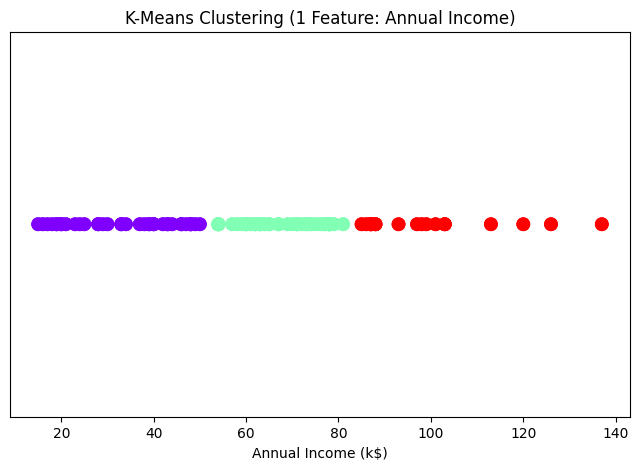

In [ ]:

#Mounting the dataset to Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/Mall_Customers.csv')

df = pd.read_csv(file_path)

# Clustering based on 1 Feature: Annual Income

X1 = df[['Annual Income (k$)']]

inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X1)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for 1 Feature (Annual Income)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

kmeans_1f = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_1F'] = kmeans_1f.fit_predict(X1)

silhouette_1f = silhouette_score(X1, df['Cluster_1F'])
print(f"Silhouette Score (1 Feature): {silhouette_1f:.3f}")

# Visualize 1D Clusters
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'], np.zeros_like(df['Annual Income (k$)']),
            c=df['Cluster_1F'], cmap='rainbow', s=80)
plt.title('K-Means Clustering (1 Feature: Annual Income)')
plt.xlabel('Annual Income (k$)')
plt.yticks([])
plt.show()

Question4: Visualisation for 3b


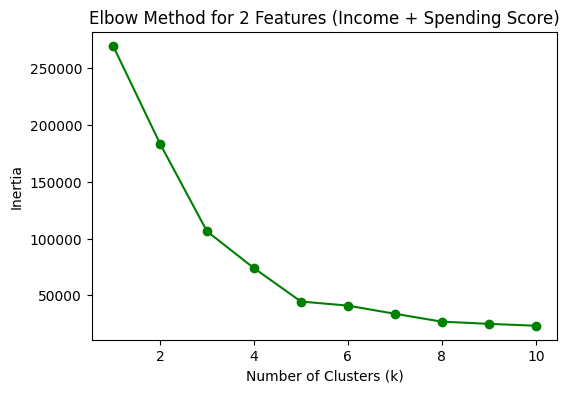

Silhouette Score (2 Features): 0.554


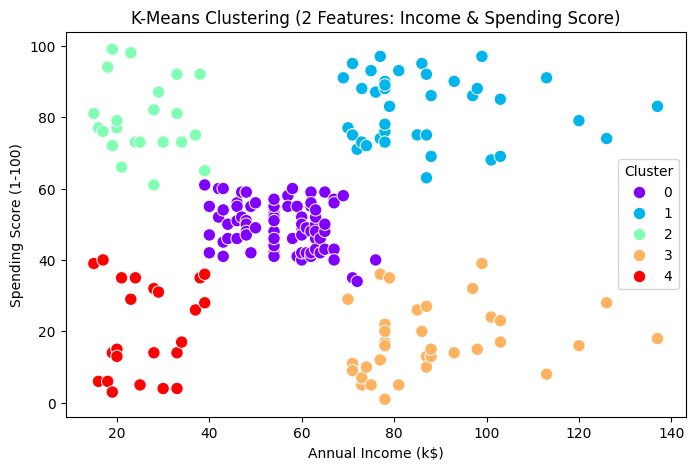

In [ ]:
# Clustering based on 2 Features: Annual Income & Spending Score

X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia_2 = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X2)
    inertia_2.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia_2, 'go-')
plt.title('Elbow Method for 2 Features (Income + Spending Score)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

kmeans_2f = KMeans(n_clusters=5, random_state=42)
df['Cluster_2F'] = kmeans_2f.fit_predict(X2)

silhouette_2f = silhouette_score(X2, df['Cluster_2F'])
print(f"Silhouette Score (2 Features): {silhouette_2f:.3f}")

# Visualize 2D Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_2F', data=df, palette='rainbow', s=80)
plt.title('K-Means Clustering (2 Features: Income & Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()



Comparisons and Comments on 3a and b


In [ ]:
print("CLUSTERING COMPARISON")
print("\n1 Feature (Annual Income):")
print("- Clusters are separated only by income levels (Low, Medium, High).")
print("- Limited insight into customer behavior.")
print("- Silhouette Score:", round(silhouette_1f, 3))

print("\n2 Features (Income + Spending Score):")
print("- Clusters are better defined, representing unique customer types:")
print("   1. Low Income, Low Spending – Price-sensitive customers")
print("   2. Low Income, High Spending – Impulsive buyers")
print("   3. Average Income, Average Spending – Typical customers")
print("   4. High Income, Low Spending – Cautious wealthy customers")
print("   5. High Income, High Spending – Premium/VIP customers")
print("- More informative for marketing and engagement strategies.")
print("- Silhouette Score:", round(silhouette_2f, 3))

CLUSTERING COMPARISON

1 Feature (Annual Income):
- Clusters are separated only by income levels (Low, Medium, High).
- Limited insight into customer behavior.
- Silhouette Score: 0.563

2 Features (Income + Spending Score):
- Clusters are better defined, representing unique customer types:
   1. Low Income, Low Spending – Price-sensitive customers
   2. Low Income, High Spending – Impulsive buyers
   3. Average Income, Average Spending – Typical customers
   4. High Income, Low Spending – Cautious wealthy customers
   5. High Income, High Spending – Premium/VIP customers
- More informative for marketing and engagement strategies.
- Silhouette Score: 0.554


 QUESTION 5 APROPRIATE WAYS FOR MALL MANAGEMENT TO INTERACT WITH CUSTOMERS.

From the clustering done in 3b, customers can be grouped into 5 segments.
1. Low income low spending - Ways in which the mall management can interact with this group of customers is through means such as sending discount offers to them as well as promoting afforadable products and bundle deals.

2. Low income high spending - The mall management can better interactions with this group by use of social media and infuencial campaigns as well as offer flash sales and limited -time promotions to them.

3. High incomne low spending - This group can appropriately be reached through means such as sending the customers personalized invitations to exclusive mall events. Furthermore they can showcase their luxury items and premium experiences.

4. High income high spending - Provision of VIP membership, early access, and concierge services as well as  sending personalized luxury recommendations is a way the mall management can reach this group.

5. Moderate income moderate spending - For this group of customers, the mall management can offer family-friendly deals as well as sms and email updates to maintain engagement with them.